# MU4MEF04 –Méthodes Numériques pour les écoulements incompressibles- S1


## TP2 Séries de Fourier

### Master SPI – MSH
#### ZHOU Zixin 28609845

In [2]:
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt
import scipy.sparse as sps
import os, sys
import math
import cmath

### Rappel préliminaire:

La représentation de Fourier de f sur le maillage $\left\{x_{i}\right\}$ est constituée par $f\left(x_{i}\right) . f=\left[f\left(x_{0}\right) \ldots f\left(x_{n-1}\right)\right]$ avec $x_{i}=\frac{i}{n}, i=0, \ldots, n-1$
Les coefficients de Fourier $y=y_{n}=\hat{f}_{k}, n=0, \ldots n-1$ peuvent être obtenus avec la commande $y=\mathrm{fft}(\mathrm{f})$.
Le premier élément $y_{0}$ contient le mode $\hat{f}_{0}$. Les $n / 2$ éléments suivants contiennent les modes $\hat{f}_{k}, k=1, \ldots, n / 2$ Les $(n-1) / 2$ éléments suivants contiennent les modes $\hat{f}_{k}, k=-n / 2+$ $1, \ldots,-2,-1 .$ Les valeurs de $\mathrm{f}$ peuvent être retrouvées avec la commande $f_{p h y s}=ifft(y)$

### Exemple: 

$f=\sin ([0:(n-1)] * 2 * p i / n) ; / f=n p . \sin (n p .$arange$(N) *$
$2 * n p \cdot p i / N)$

Prendre $\mathrm{n}=10$ et calculer $y=f f t(f) ;$ y contient des complexes qui sont tous nuls exceptés en deuxième et en dernière position ce qui correspond bien à
$$
\sin (2 \pi x)=\frac{1}{2 i} *(\exp (2 i \pi x)-\exp (-2 i \pi x))
$$

In [3]:
N = 10
f = np.sin(np.arange(N) * 2 * np.pi/N)

y = np.fft.fft(f)
y = y.round(2)
print(y)

[ 0.+0.j -0.-5.j  0.-0.j  0.-0.j  0.-0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j
 -0.+5.j]


### Activité

On considère
$$
f(x)=100 e^{-20 x}(x-x^{2})
$$

sur [0, 1[.

### 1. Rappelez pourquoi peut-on appliquer la transformée de Fourier à f?

Dans les approches par differences finies et volumes finis quenous venons de voir, la solutionnumérique n’est définie qu’en certains points, et jusquà un certain ordre. Pour pouvoir comparer la solution numérique à la solution exacte, il faudrait que celles-ci soient définies sur le même domaine spatial. Ceci nous conduit à une nouvelle façon de définir la solution qui va ́ecrire comme la combinaison d’une base de fonctions définies sur tout l’espace. 

### 2. Calculer les matrices de passage de l’espace de Fourier vers l’espace physique et de l’espace physique vers l’espace de Fourier pour des maillages de 50, 100, 500 intervalles.

In [4]:
# Matrice de passage de l’espace de Fourier vers l’espace physique 
def M_phsp(N):
    M = np.eye(N)
    M = M.astype('complex')
    k = np.linspace(-N/2 , N/2 - 1, N)
    l = np.linspace(0, N - 1, N)
    for j in range(0, N):
        for i in range(0, N):
            M[i,j] = cmath.exp(cmath.sqrt( -1) * 2 * math.pi * k[j] * l[i]/N)
    #M = M.round(4)
    return M

# Matrice de passage de l’espace physique vers l’espace de Fourier
def M_spph(N):
    M = np.eye(N)
    M = M.astype('complex')
    k = np.linspace(- N/2 , N/2 - 1, N)
    l = np.linspace(0, N - 1, N)
    for j in range(0, N):
        for i in range(0, N):
            M[j,i] = 1./N*cmath.exp(- cmath.sqrt( -1) * 2 * math.pi * k[j] * l[i]/N)
    #M = M.round(4)
    return M


for N in [50,100,500]:
    print "Pour N = %d"%N, "le matrice de passage de espace de Fourier vers espace physique M_phsp est:"
    print M_phsp(N)
    print "Pour N = %d"%N, "le matrice de passage de espace physique vers espace de Fourier M_phsp est:"
    print M_spph(N)

Pour N = 50 le matrice de passage de espace de Fourier vers espace physique M_phsp est:
[[ 1.        -0.00000000e+00j  1.        -0.00000000e+00j
   1.        -0.00000000e+00j ...  1.        +0.00000000e+00j
   1.        +0.00000000e+00j  1.        +0.00000000e+00j]
 [-1.        -1.22464680e-16j -0.9921147 -1.25333234e-01j
  -0.96858316-2.48689887e-01j ... -0.92977649+3.68124553e-01j
  -0.96858316+2.48689887e-01j -0.9921147 +1.25333234e-01j]
 [ 1.        +2.44929360e-16j  0.96858316+2.48689887e-01j
   0.87630668+4.81753674e-01j ...  0.72896863-6.84547106e-01j
   0.87630668-4.81753674e-01j  0.96858316-2.48689887e-01j]
 ...
 [-1.        +4.90230108e-15j -0.92977649+3.68124553e-01j
  -0.72896863+6.84547106e-01j ... -0.42577929-9.04827052e-01j
  -0.72896863-6.84547106e-01j -0.92977649-3.68124553e-01j]
 [ 1.        +5.87830464e-15j  0.96858316-2.48689887e-01j
   0.87630668-4.81753674e-01j ...  0.72896863+6.84547106e-01j
   0.87630668+4.81753674e-01j  0.96858316+2.48689887e-01j]
 [-1.       

### 3. Calculer les coefficients de Fourier pour les différents maillages. Vérifier que vous retrouvez bien les mêmes résultats qu’avec matlab.

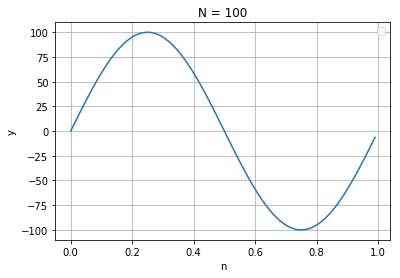

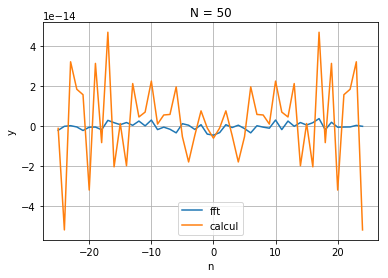

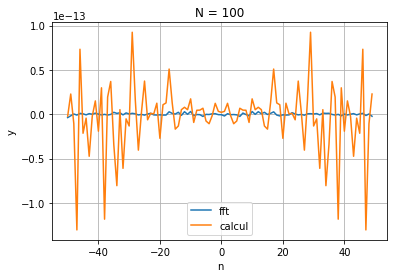

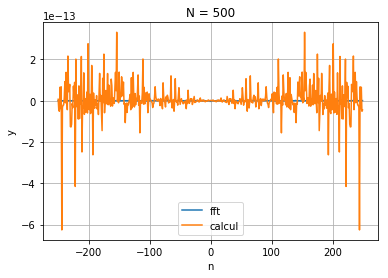

In [6]:
#Représenter f sur une grille régulière de N=100 points.

N = 100
x = np.linspace(0, 1, N, endpoint = False)  
f = 100 * np.exp(-20 * x) * (x - x*x)    
f = 100 * np.sin(2*math.pi*x)
plt.figure()
plt.xlabel("n")
plt.ylabel("y")
plt.title("N = %d" %N)
plt.grid()
plt.plot(x,f)
plt.legend() 
plt.show()

for N in [50,100,500]:
    x = np.linspace(0, 1, N, endpoint = False)
    n = np.linspace(-N/2, N/2, N, endpoint = False)
    f = 200 * np.exp(-20 * x) * (np.sin(20 * math.pi * x))
    
    
    # FFT
    y     = np.fft.fft(f)/N
    A     = y[N/2:]
    B     = y[: N/2]
    y_fft = np.append(A,B)
    
    # Calcul avec le matrice
    y_c = np.dot(M_spph(N), f.reshape(-1,1))

    # Comparaison des deux méthodes
    plt.figure()
    plt.xlabel("n")
    plt.ylabel("y")
    plt.title("N = %d" %N)
    plt.grid()
    plt.plot(n,y_fft,label = "fft")
    plt.plot(n,y_c,label = "calcul")
    plt.legend() 
    plt.show()

        

Selon les graphies, les résultats des calculs sont cohérents avec les résultats de la méthode $fft$.

### 4. Calculer la dérivée de f aux points xi à partir des f(xi) en utilisant les formules vues en cours. Comparer avec l’expression exacte. Evaluer l’erreur totale en utilisant la norme L2 .


La dérivée exacte $f^{\prime}$ est :
$$
f^{\prime}=100e^{-20x}(-22x+20x^{2} +1)
$$

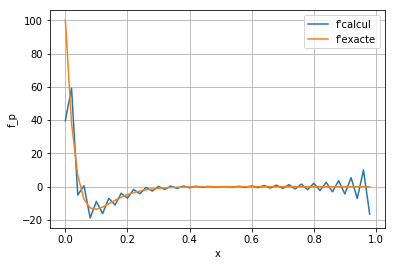

Pour N = 50 l'erreur d'approximation est 974.609800317453


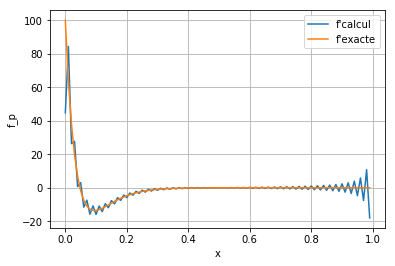

Pour N = 100 l'erreur d'approximation est 1749.818649311185


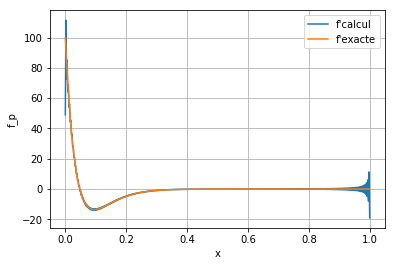

Pour N = 500 l'erreur d'approximation est 7924.9240896673045
[974.609800317453, 1749.818649311185, 7924.9240896673045]


In [5]:
# Matice du dérivée de espace de Fourier
def D_sp(N):
    D_sp           = np.eye(N)
    D_sp           = D_sp .astype('complex')
    k              = np.linspace(-N/2, N/2 - 1, N)
    row, col       = np.diag_indices_from(D_sp)
    D_sp[row, col] = k * 2 * math.pi * cmath.sqrt(-1)
    return D_sp

# Matice du dérivée de espace physique
def D_ph(N):
    D_ph           = np.eye(N)
    D_ph           = D_ph .astype('complex')
    C              = np.dot(M_phsp(N), D_sp(N))
    D_ph           = np.dot(C, M_spph(N))
    return D_ph

erreur = []   

# Calcule la dérivée de f
for N in [50,100,500]:
    x  = np.linspace(0, 1, N, endpoint = False)
    dx = x[1] - x[0]
    n  = np.linspace(-N/2 , N/2 , N, endpoint = False)
    f  = 100 * np.exp(-20 * x) * (x - x*x)
    
    # La dérivée exacte
    fp_e = 100 * np.exp(-20 * x) * (-22 * x + 20 * x * x + 1)
    
    # Calcule la dérivée
    fp   = np.dot(D_ph(N), f.reshape(-1,1))

    # Comparaison des deux valeurs
    plt.figure()
    plt.xlabel("x")
    plt.ylabel("f_p")
    plt.grid()
    plt.plot(x,fp,label="f'calcul")
    plt.plot(x,fp_e,label="f'exacte")
    plt.legend() 
    plt.show()    
    
    # L’erreur totale en utilisant la norme L2
    e = norm(fp - fp_e)
    print "Pour N = %d"%N, "l'erreur d'approximation est", e
    erreur.append(e)
print erreur  

### 5. Comment décroissent les coefficients de Fourier en fonction de k pour $k>0 ?$ (Vous pouvez calculer le produit $\left|\tilde{f}_{k}\right| k^{p}$ et chercher pour quelles valeurs de $\mathrm{p}$ le produit est approximativement constant). Pouvez-vous justifier? (Penser à la dérivabilité de la fonction et à la continuité de la dérivée aux bornes)

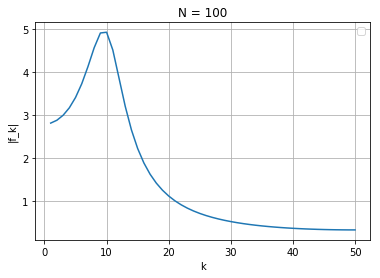

In [6]:

#fft
N = 100

x    = np.linspace(0, 1, N, endpoint = False)
k    = np.linspace(- N/2, N/2, N, endpoint = False)
k_s  = np.linspace(1, N/2 + 1, N/2, endpoint = False)
f    = 200 * np.exp(-20 * x) * (np.sin(20 * math.pi * x))

f_k  = np.fft.fft(f)/N
f_ks = np.abs(f_k[1: 100/2 + 1])

#La norme des coefficients de Fourier en fonction de k
plt.figure()
plt.xlabel("k")
plt.ylabel("|f_k|")
plt.title("N = %d" %N)
plt.grid()
plt.plot(k_s,f_ks)
plt.legend() 
plt.show()


Quand k est entre 0 et 8, les coefficients de fourier montent exponentiellement. Quand k est entre 8 et 10, les coefficients de fourier sont constants. Quand k est supérieur à 10, les coefficients de fourier descendent rapidement au début, ensuite tendent vers une valeur constante,

 Supposons que le $\left|\tilde{f}_{k}\right| k^{p}$ est un constante égale à $1$. On peut écrire cette l'équation sous la forme :
 $$ k^{p} = {\left|\tilde{f}_{k}\right|}^{-1}$$
 
 On prend le logarithme de chaque côté,
 $$plog(k) = -log({\left|\tilde{f}_{k}\right|})$$
 Donc 
 $$p = - \frac{log({\left|\tilde{f}_{k}\right|})}{log(k)}$$

/home/zixin/.local/lib/python2.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in divide
  import sys


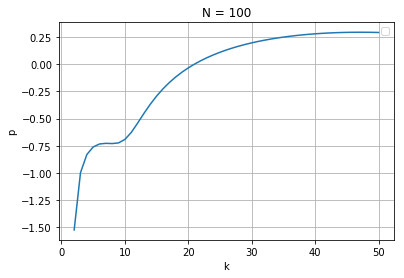

In [7]:
#  Les valeurs de p en fonction de k 
plt.figure()
plt.xlabel("k")
plt.ylabel("p")
plt.title("N = %d" %N)
plt.grid()
plt.plot(k_s, - np.log(f_ks)/np.log(k_s))
plt.legend() 
plt.show()